# Compare Optimized Mini-Neptune Case Presented During Final Talk at NASA w/ New Script

In [14]:
import os
os.environ['picaso_refdata']="/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/picasofiles/reference" 
os.environ['PYSYN_CDBS']="/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/picasofiles/grp/redcat/trds"
import picaso.justdoit as jdi

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import copy
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import pickle
from itertools import cycle
import matplotlib.colors as mcolors
from photochem.utils import stars

## Load old results of K218b presented during NASA Summer 2025 Internship
- total flux: .915x solar
- metallicity: 0.5x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

In [35]:
with open('K218b_result_dict.pkl', 'rb') as file:
        old_K218b_dictionary = pickle.load(file)
old_K218b_dictionary

{'PT_list_.915_0.5_155_5': [array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
         2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
         6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
         1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
         3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
         1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
         2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
         6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
         1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
         3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
         1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
         2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
         6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
         1.58489319e-01, 

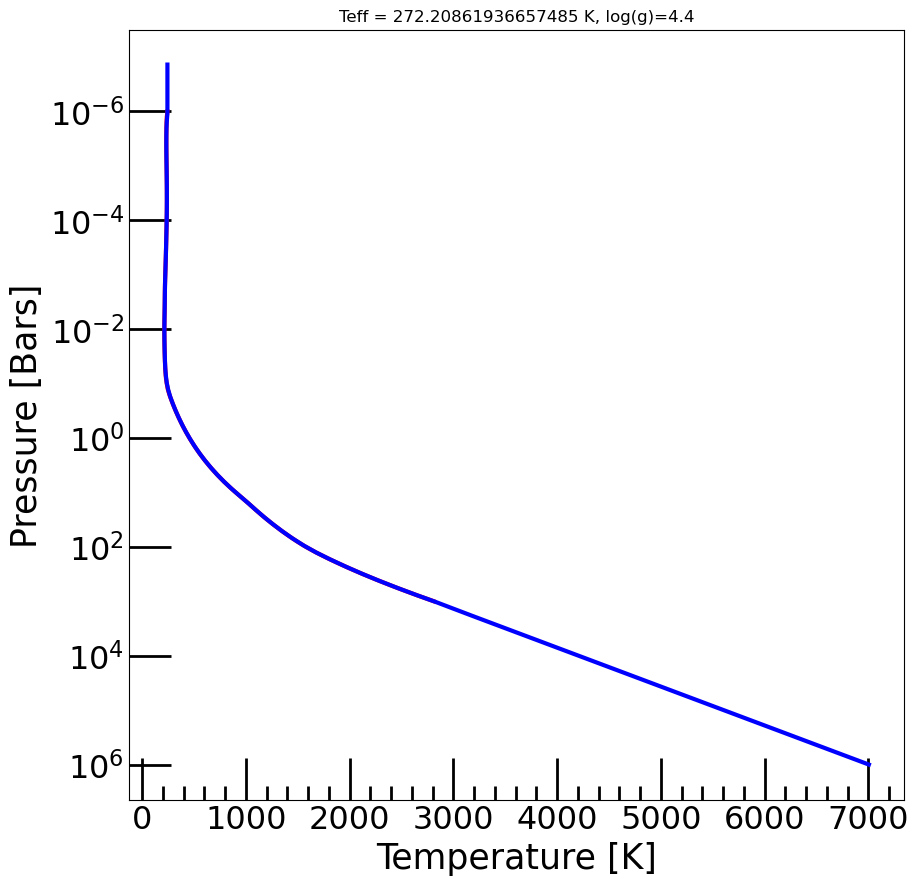

In [36]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(old_K218b_dictionary['PT_list_.915_0.5_155_5'][1],old_K218b_dictionary['PT_list_.915_0.5_155_5'][0],color="r",linewidth=3, label='PICASO PT')
plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

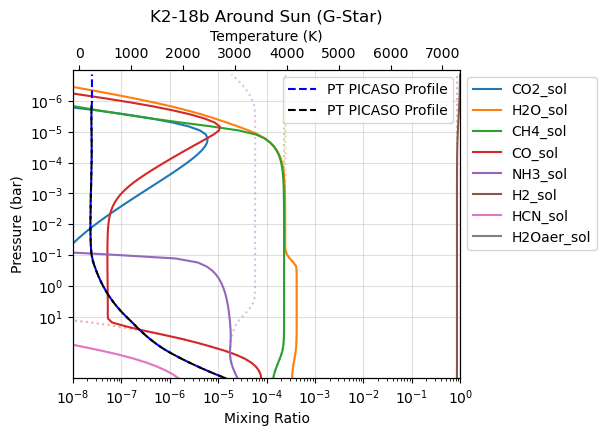

In [41]:
# This is the Photochemical Profile

soleq_dict = old_K218b_dictionary['soleq_dict']
sol_dict = old_K218b_dictionary['sol_dict']
PT_list_Photochem = old_K218b_dictionary['PT_list_Photochem']
PT_list = old_K218b_dictionary['PT_list_.915_0.5_155_5']

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2_sol','H2O_sol','CH4_sol','CO_sol','NH3_sol','H2_sol','HCN_sol','H2Oaer_sol']
species_soleq = ['CO2_soleq','H2O_soleq','CH4_soleq','CO_soleq','NH3_soleq','H2_soleq','HCN_soleq','H2Oaer_soleq']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_dict[sp],soleq_dict['pressure_soleq']/1e6, ls=':', c='C'+str(i), alpha=0.4)
for i,sp in enumerate(species_sol):
    ax1.plot(sol_dict[sp],sol_dict['pressure_sol']/1e6, c='C'+str(i), label=sp)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-8,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(10**6)), c='blue', ls='--',label='PT PICASO Profile')
ax2.plot(np.flip(PT_list[1]), np.flip(PT_list[0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star)')
    
plt.legend()

plt.show()

## Same K218b case, but with new opacities (should be relatively similar)

### Old Inputs:
- total flux: .915x solar
- metallicity: 0.5x (logspace) x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

### New Inputs:
- planet radius: 2.61x Earth 
- metallicity: 0.5x (logspace) x solar
- tint: 155K
- semi major in AU: 1.047920906403798 AU
- ctoO_solar: 1x solar c/o ratio

### Also same star specs


In [44]:
def calc_semi_major_SUN(Teq):
    """
    Calculates the semi-major distance from the Sun of a planet whose equilibrium temperature can vary.
    
    Parameters:
    
    Teq: float
        This is the equilibrium temperature (in Kelvin) calculated based on total flux (or otherwise) of the planet.

    Results:
    
    distance_AU: float
        Returns the distance from the planet to the Sun to maintain equilibrium temperature in AU.
    
    """
    luminosity_star = 3.846*(10**26) # in Watts for the Sun
    boltzmann_const = 5.670374419*(10**-8) # in W/m^2 * K^4 for the Sun
    distance_m = np.sqrt(luminosity_star / (16 * np.pi * boltzmann_const * (Teq**4)))
    distance_AU = distance_m / 1.496e+11
    return distance_AU

In [45]:
total_flux = 0.915
Teq = stars.equilibrium_temperature(total_flux*1361, 0) # Note converts total_flux in Earth units to Watts/m^2
semi_major = calc_semi_major_SUN(Teq=Teq) # in AU
print(semi_major)

1.047920906403798
